# Проект по логистической регрессии

**Задача: Создать модель классификации для предосказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)**


## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

----

In [3]:
df = pd.read_csv('../DATA/heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df['target'].unique()

array([1, 0], dtype=int64)

### Анализ данных и визуализация данных


**Посмотрим, есть ли в наборе данных отсутствующие значения, и создадим статистический отчёт о числовых колонках.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Визуализация данных

**Нарисуем график bar plot, показывающий количество точек для каждого значения target.**

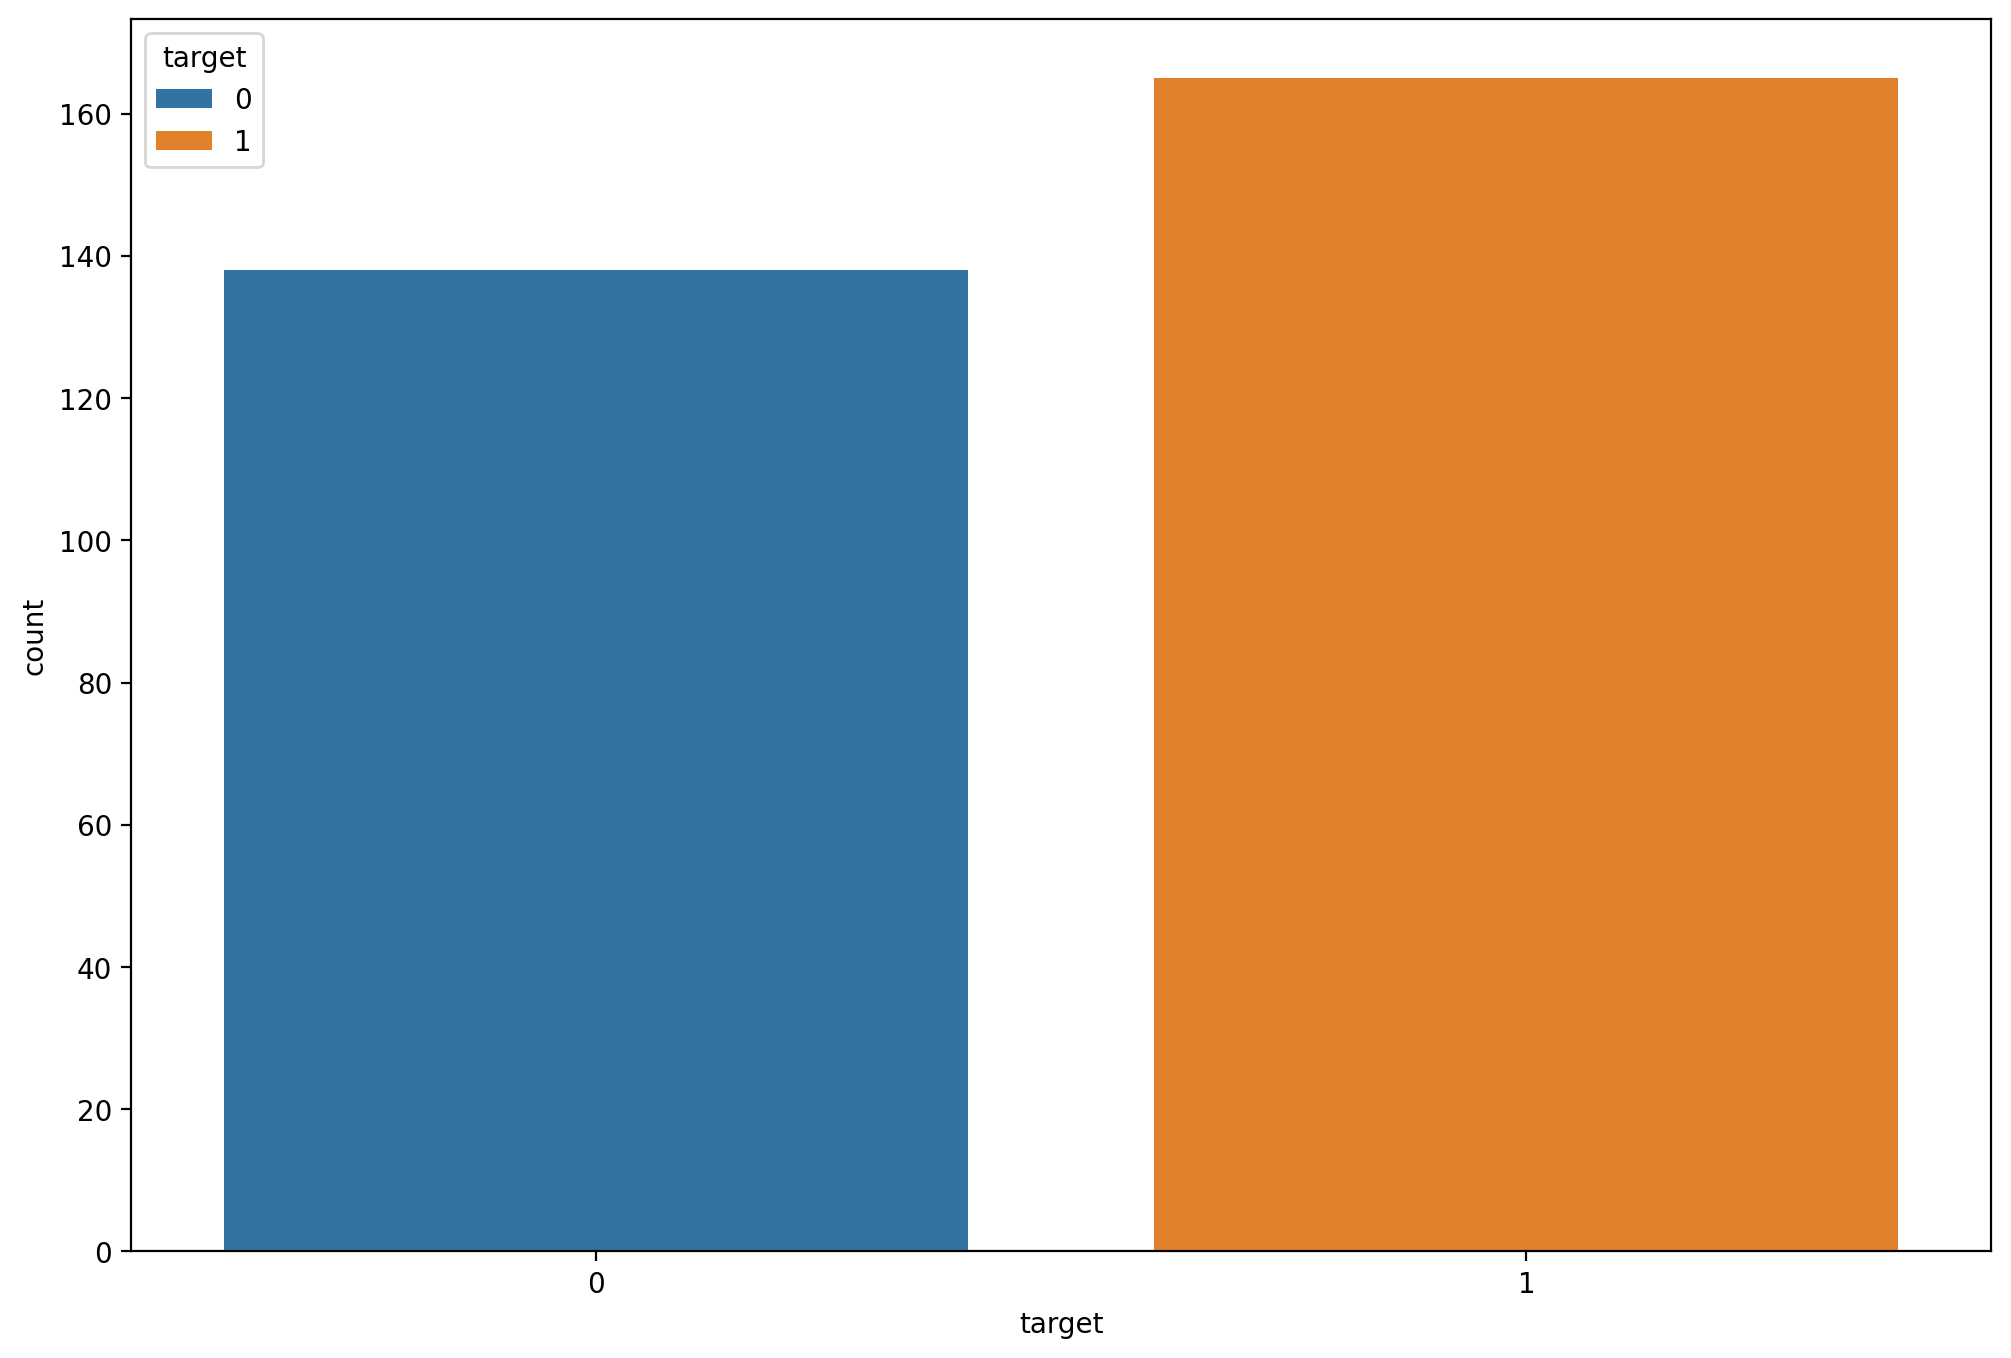

In [19]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='target', hue='target')
plt.show()

**Нарисуем график pairplot, показывающий связи между следующими колонками:**

    ['age','trestbps', 'chol','thalach','target']
   
*Замечание: если запустить pairplot по всем колонкам, то это заняло бы очень много времени, поскольку колонок много.*

<Figure size 2400x1600 with 0 Axes>

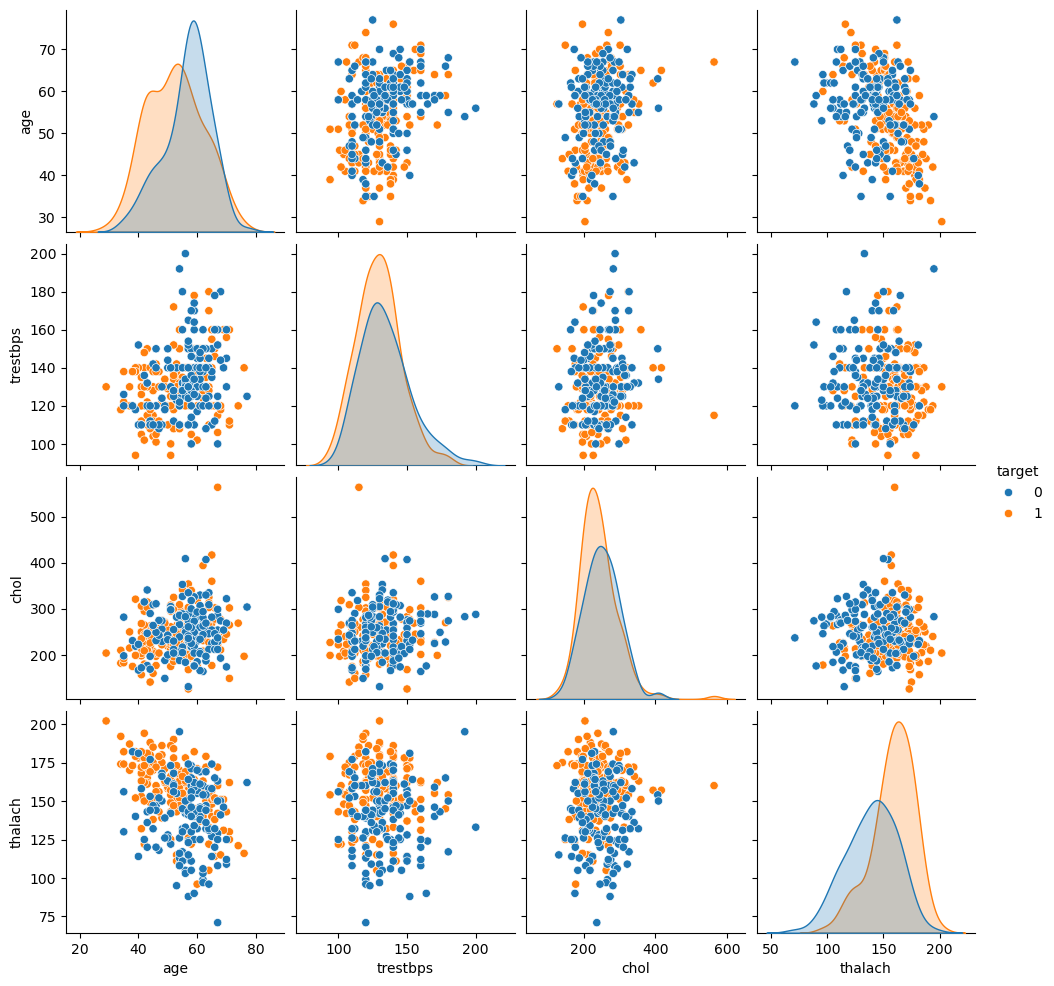

In [23]:
plt.figure(figsize=(12, 8), dpi=200)
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']], hue='target')
plt.show()

**Нарисуем график heatmap, показывающий корреляции между всеми колонками.**

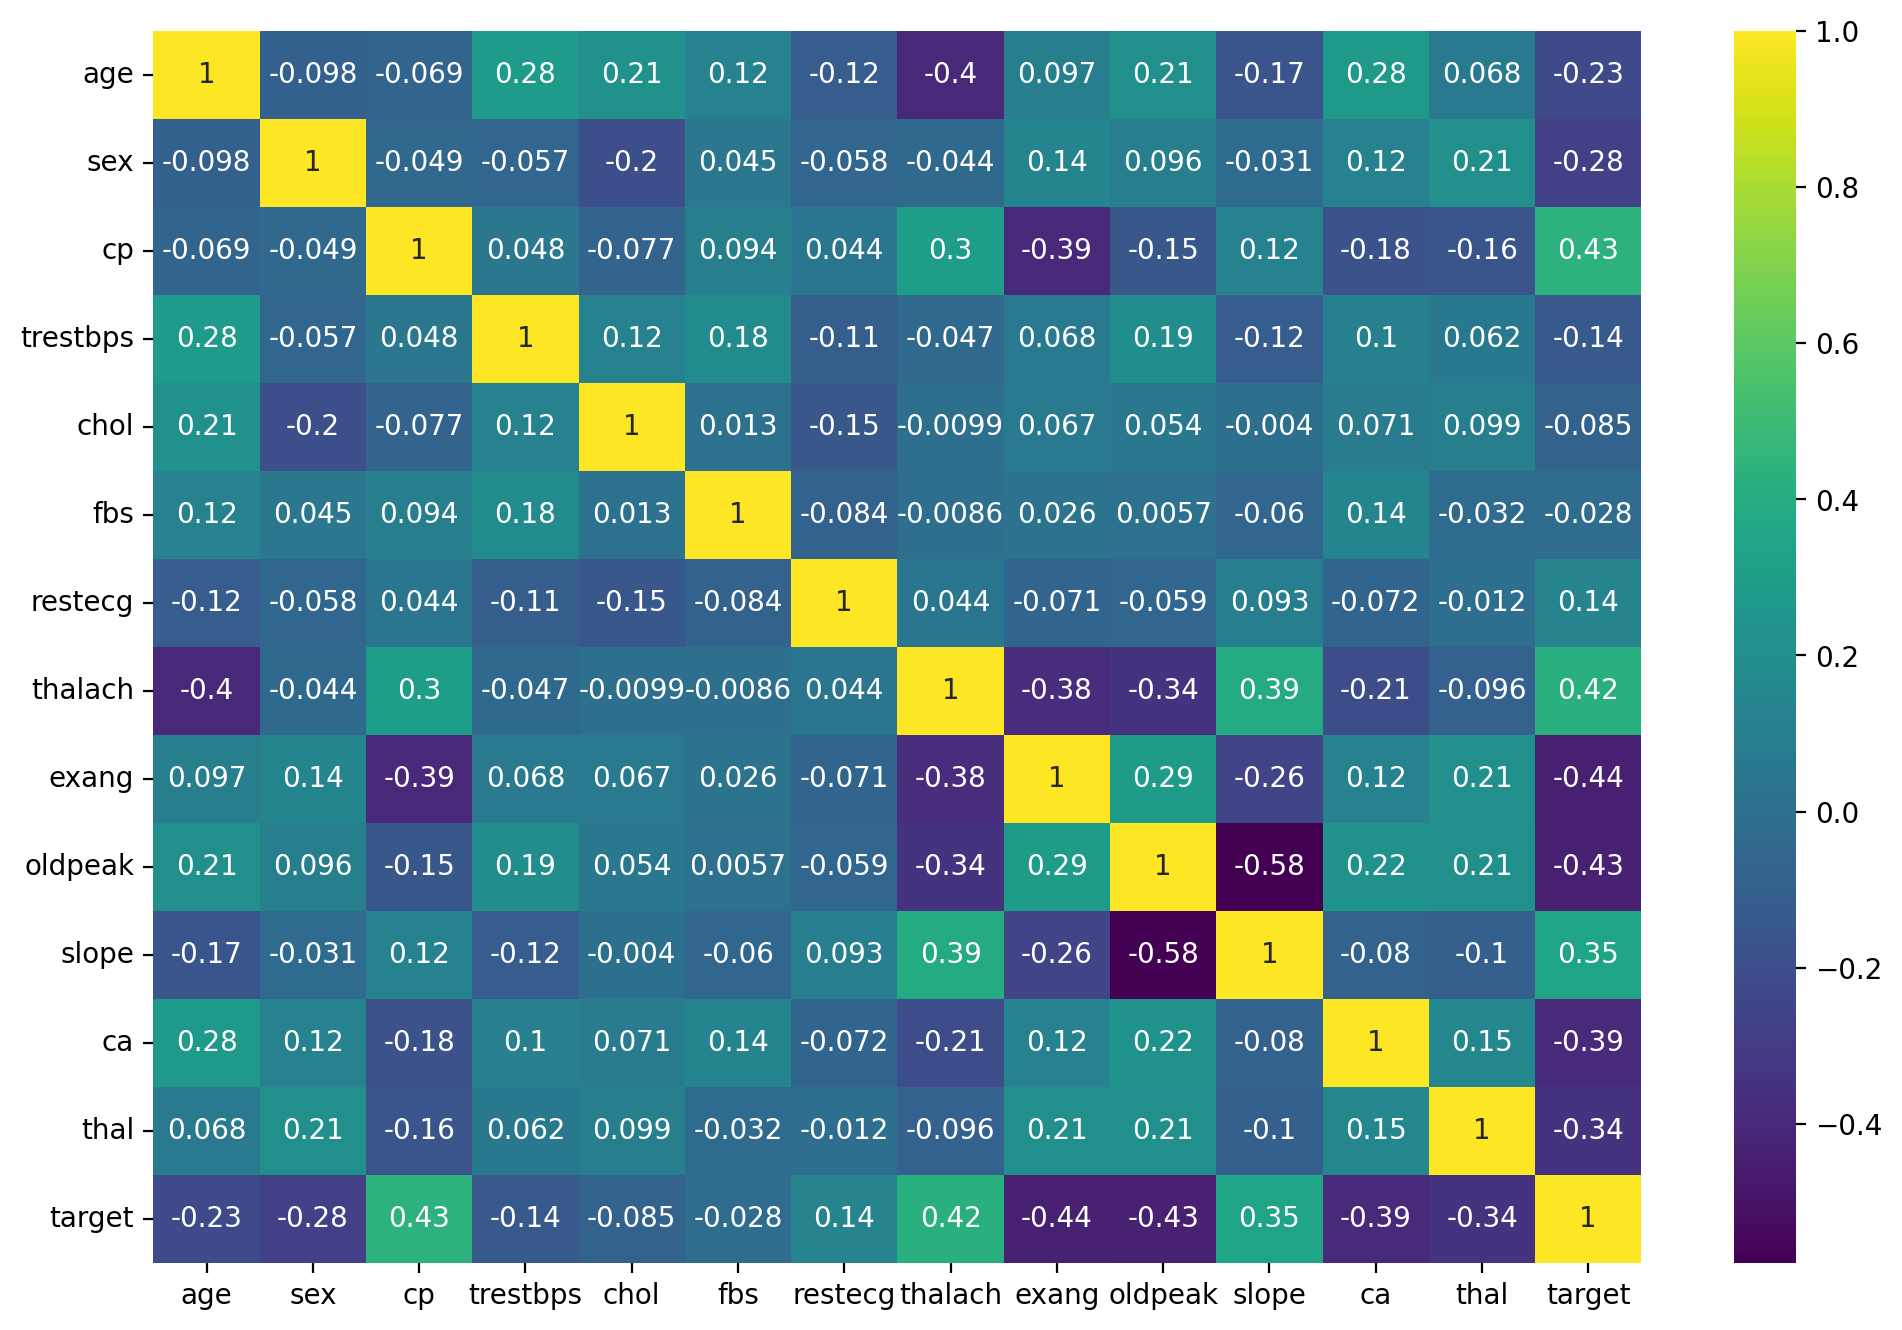

In [29]:
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.show()

----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

**Разделим все признаки на 2 объекта, X и y.**

In [31]:
X = df.drop('target', axis=1)
y = df['target']

**Разобьём данные на обучающий и тестовый наборы данных. Для тестовых данных будем использовать размер 10% и значение random_state=101.**

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**С помощью объекта StandardScaler нормализуем данные признаков в обучающем и тестовом наборах данных.**

In [37]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Модель логистической регрессии

**Создадим модель логистической регрессии, и с помощью кросс-валидации найдём хорошее значение значение C. Здесь есть 2 варианта - либо *LogisticRegressionCV*, либо комбинация *LogisticRegression* и *GridSearchCV*.**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [45]:
log_model = LogisticRegression(max_iter=5000)

In [47]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ration = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {'penalty': penalty,
              'l1_ratio': l1_ration,
              'C': C}

In [49]:
grid_model = GridSearchCV(log_model, param_grid=param_grid, verbose=2)

In [51]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ....................C=1.0, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END ............C=1.0, l1_ratio=0.0, pe

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END ....C=1.0, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END ....C=1.0, l1_ratio=0.21052631578947367, penalty=l2; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END .....C=1.0, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END .....C=3.3598182862837818, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END .....C=3.3598182862837818, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.05263157

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=3.3598182862837818, l1_ratio=0.894736842105263, penalty=l2; total time=

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=11.28837891684689, l1_ratio=0.631578947368421, penalty=elasticnet; total ti

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=l2; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=37.926901907322495, l1_ratio=

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.21052631578947367, penalty=elasticnet; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l1; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=127.42749857031335, l1_ratio=0.263157894736

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.0, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l1; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l1; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2; total time=   0.0s
[CV] END C=428.1332398719391, l1_ratio=0.6842105263157894, penalty=l2; total ti

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END C=1438.449888287663, l1_ratio=0.42105263157894735,

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.10526315789473684, penalty=elasti

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=l2; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=4832.930238571752, l1_ratio=0.894736842105263, penal

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=16237.76739188721, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=16

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=l2; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.3684210526315789, penalty=elasticnet; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.42105263157894735, penalty=l1; total time=   0.0s
[CV] END C=54555.947811685146, l1_ratio=0.42105

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=l2; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.15789473684210525, penalty=elasticnet; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=0.157894

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END C=183298.07108324338, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l1; total time=   0.0s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C=615848.2110660254, l1_ratio=0.0, penalty=l2; total time=   0.0s
[CV] END ......C

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=l2; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.7894736842105263, penalty=elasticnet; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, penalty=l1; total time=   0.0s
[CV] END C=615848.2110660254, l1_ratio=0.8421052631578947, p

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l1; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=l2; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=2069138.0811147902, l1_ratio=0.631578947368421, penalty=elasticnet; total time=  

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.42105263157894735, penalty=elasticnet; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.47368421052631576, penalty=l1; total time=   0.0s
[CV] END C=6951927.961775606, l1_ratio=0.473684210

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=l2; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.2631578947368421, penalty=elasticnet; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END C=23357214.690901212, l1_ratio=0.31578947

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.05263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.10526315789473684, penalty=l1; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.105263157

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=78475997.03514607, l1_ratio=0.8421052631578947, penalty=elasticnet; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l1; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=78475997.03514607, l1_ratio=0.894736842105263, penalty=l2; total time=   0.0s
[CV] END C=7

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.6842105263157894, penalty=elasticnet; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l1; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579, penalty=l2; total time=   0.0s
[CV] END C=263665089.87303555, l1_ratio=0.7368421052631579

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=l2; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5263157894736842, penalty=elasticnet; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, penalty=l1; total time=   0.0s
[CV] END C=885866790.4100832, l1_ratio=0.5789473684210527, p

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l1; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=l2; total time=   0.0s
[CV] END C=2976351441.6313133, l1_ratio=0.3157894736842105, penalty=elasticnet; total time

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=l2; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.10526315789473684, penalty=elasticnet; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV] END C=10000000000.0, l1_ratio=0.15789473684210525, penalty=l1; total time=   0.0s
[CV

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio paramet

[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ..........C=10000000000.0, l1_ratio=1.0, penalty=l2; total time=   0.0s
[CV] END ..C=10000000000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ..C=10000000000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ..C=10000000000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ..C=10000000000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s
[CV] END ..C=10000000000.0, l1_ratio=1.0, penalty=elasticnet; total time=   0.0s


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4000 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with th

GridSearchCV(estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=2)

In [53]:
grid_model.best_params_

{'C': 3.3598182862837818, 'l1_ratio': 0.0, 'penalty': 'l2'}

**Отобразим результаты поиска оптимальных параметров, особенно значение C.** 

*Замечание: значение может отличаться от найденного в данном блокноте, поскольку оно зависит от метода поиска.*

In [65]:
grid_model.best_params_['C']

3.3598182862837818

In [67]:
grid_model.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 5000,
 'estimator__multi_class': 'deprecated',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=5000),
 'n_jobs': None,
 'param_grid': {'penalty': ['l1', 'l2', 'elasticnet'],
  'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
         0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
         0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
         0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
  'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
         1.274

### Коэффициенты

**Отобразим коэффициенты модели.**

In [71]:
grid_model.best_estimator_.coef_

array([[-0.06913579, -0.76920653,  0.92721286, -0.27525963, -0.2274408 ,
         0.04629485,  0.1240757 ,  0.44699495, -0.43485773, -0.54217431,
         0.39432989, -0.88385718, -0.59170762]])

**Создадим визуализацию коэффициентов, нарисуя их с помощью графика barplot. Дополнительно отсортируем график.**

In [83]:
coefs = pd.Series(data=grid_model.best_estimator_.coef_[0], index=X.columns).sort_values()
coefs

ca         -0.883857
sex        -0.769207
thal       -0.591708
oldpeak    -0.542174
exang      -0.434858
trestbps   -0.275260
chol       -0.227441
age        -0.069136
fbs         0.046295
restecg     0.124076
slope       0.394330
thalach     0.446995
cp          0.927213
dtype: float64

In [107]:
coefs_df = coefs.reset_index()
coefs_df.columns = ['feature', 'coefficient']

# Добавим дополнительную категориальную переменную для hue
coefs_df['hue'] = coefs_df['feature']  # Используем feature как hue

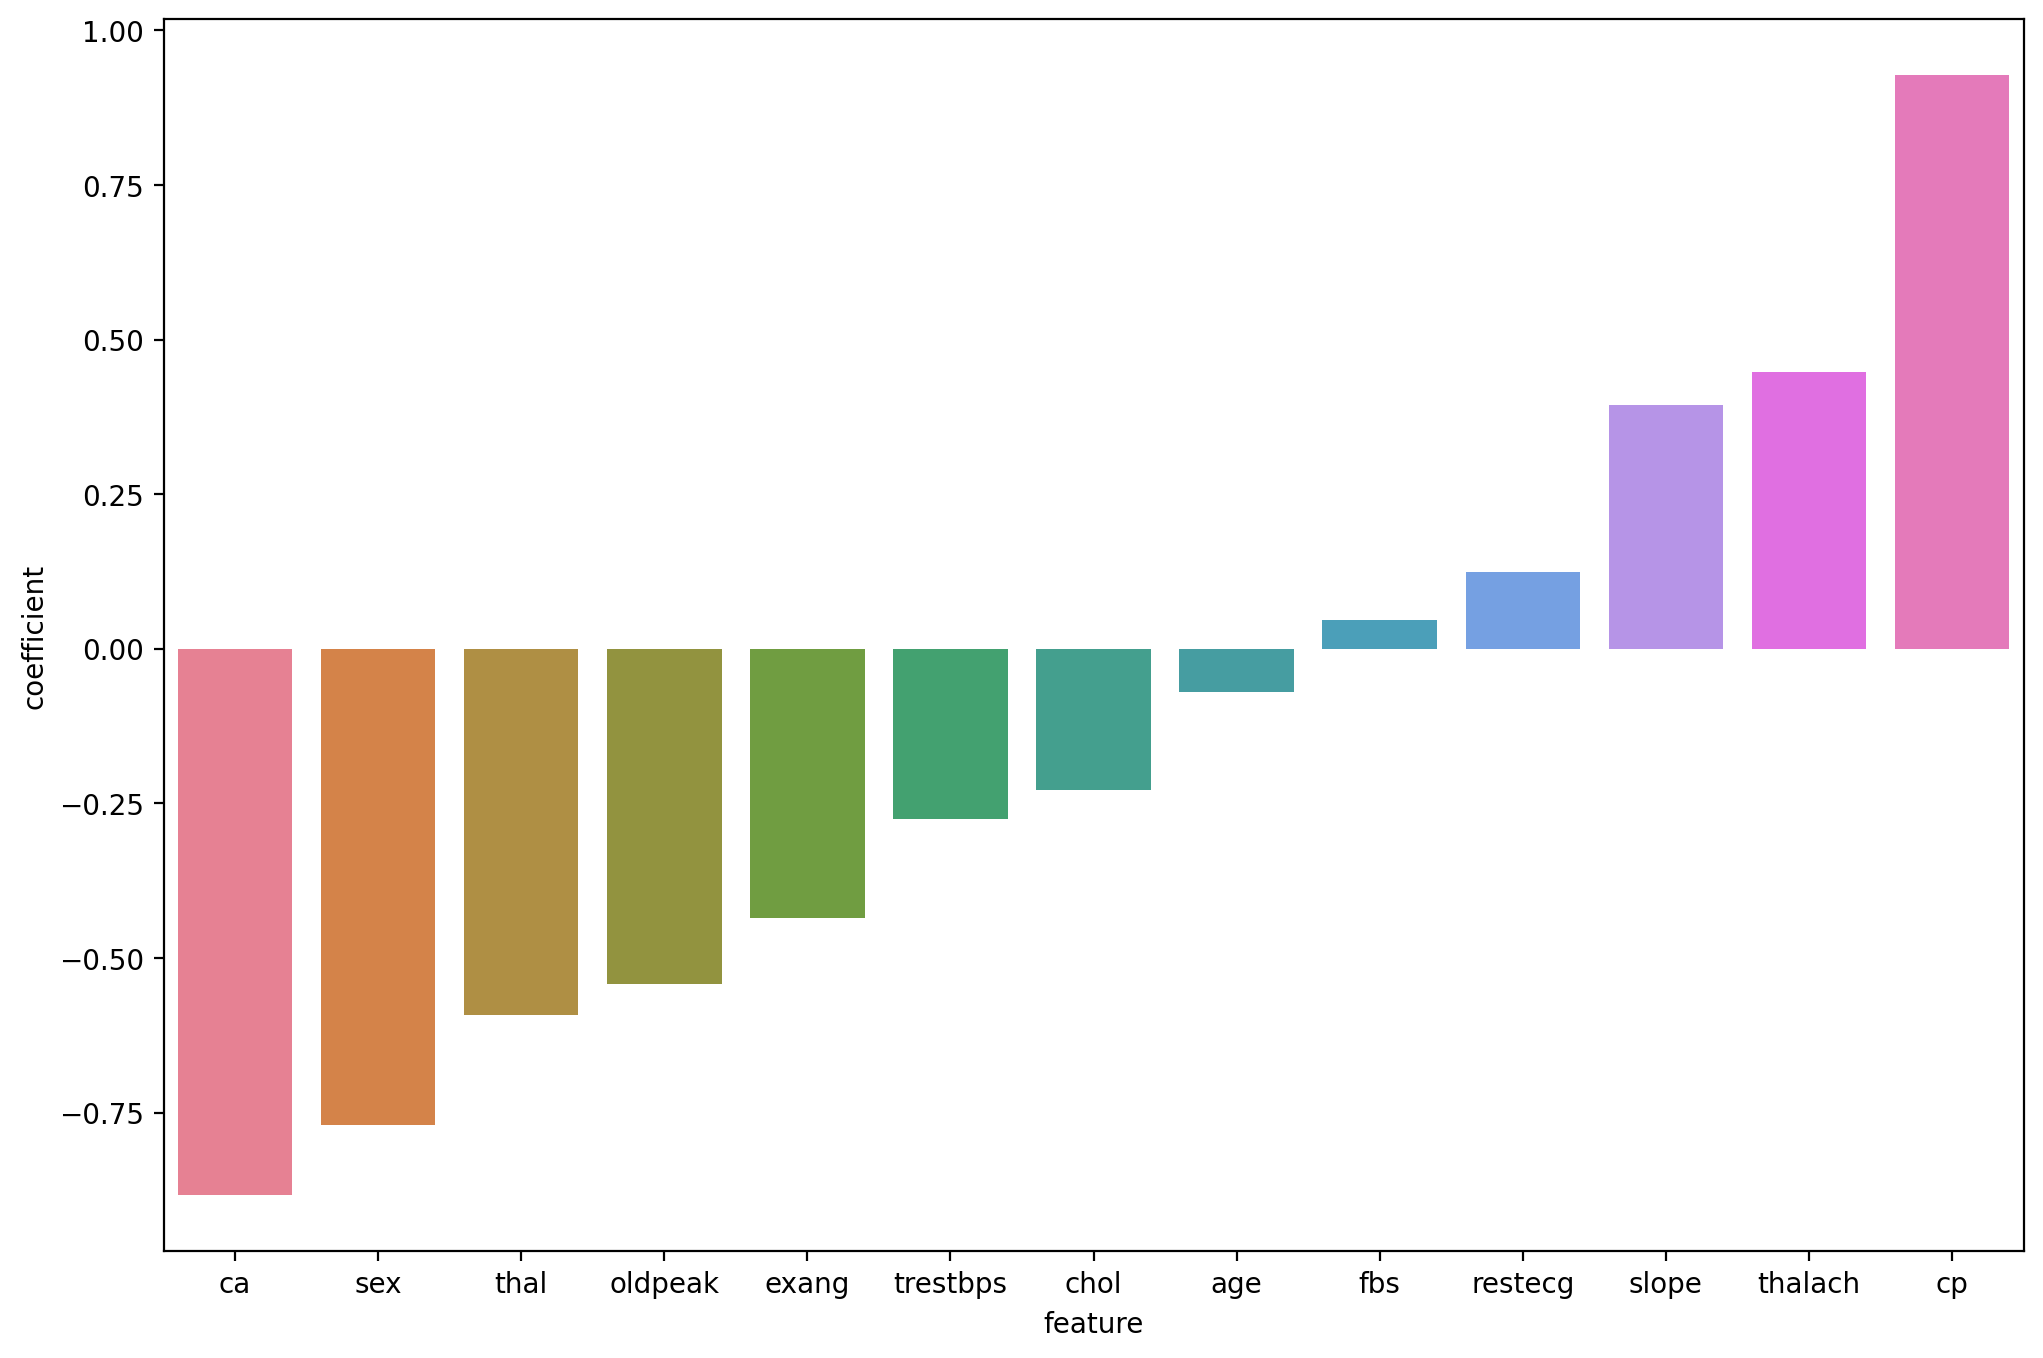

In [111]:
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(x='feature', y='coefficient', data=coefs_df, hue='hue', legend=False)
plt.show()

---------

## Оценка модели

**Оценим работу модели на оставшихся 10% данных - тестовом наборе данных.**

**Подготовим следующие оценки:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [113]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [115]:
y_pred = grid_model.predict(scaled_X_test)

In [117]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [119]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

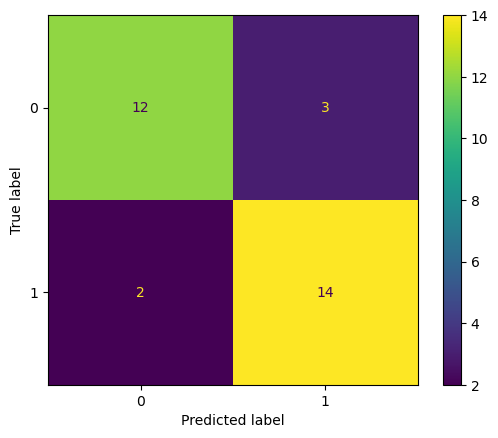

In [121]:
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test)

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Кривые производительности

**Нарисуем графики "precision recall curve" и "ROC Curve".**

In [125]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

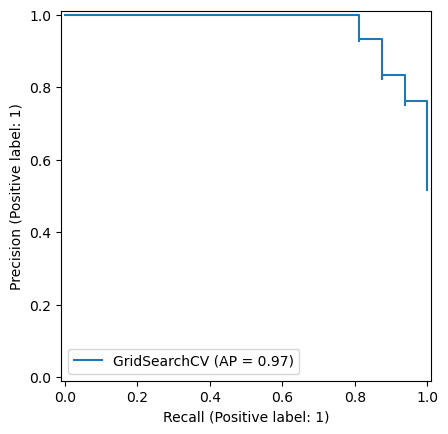

In [127]:
PrecisionRecallDisplay.from_estimator(grid_model, scaled_X_test, y_test)

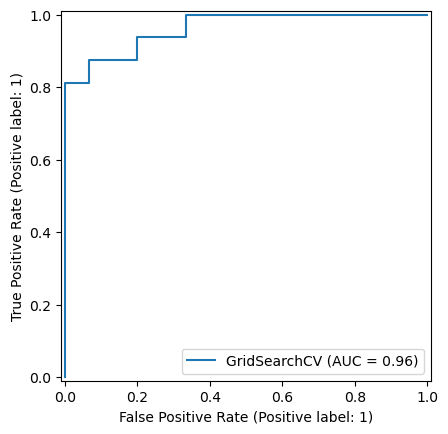

In [129]:
RocCurveDisplay.from_estimator(grid_model, scaled_X_test, y_test)

**Допустим: в офис клиники пришёл пациент со следующими значениями признаков:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**Что предскажет модель для этого пациента? Есть ли здесь заболевание сердца? Насколько модель "уверена" в своём прогнозе?**

In [131]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [133]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [135]:
y_test.iloc[-1]

0

In [137]:
grid_model.predict(scaler.transform(patient))

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [139]:
grid_model.predict_proba(scaler.transform(patient))

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.99224347, 0.00775653]])

----